# **1. Introduction to Support Vector Machines** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the **kernel trick**. It enable us to implicitly map the inputs into high dimensional feature spaces.




# **2. Support Vector Machines intuition** <a class="anchor" id="2"></a>



### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

The following diagram illustrates these concepts visually.


### Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


### Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.


### Kernel trick - transformation of input space to higher dimensional space

![Kernel trick](http://www.aionlinecourse.com/uploads/tutorials/2019/07/11_21_kernel_svm_3.png)



[Go to Top](#0)

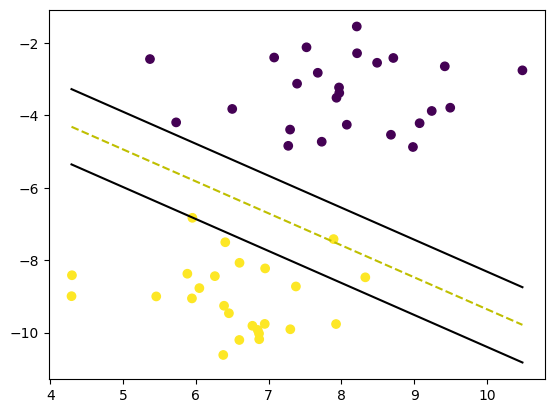

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Ensure labels are -1 or 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

# Example usage
if __name__ == "__main__":
    # Create simple linearly separable data
    from sklearn.datasets import make_blobs

    X, y = make_blobs(n_samples=50, centers=2, random_state=6)
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    predictions = clf.predict(X)

    # Plotting
    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

        plt.show()

    visualize_svm()
